In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv("dataset.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [40]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


<Axes: >

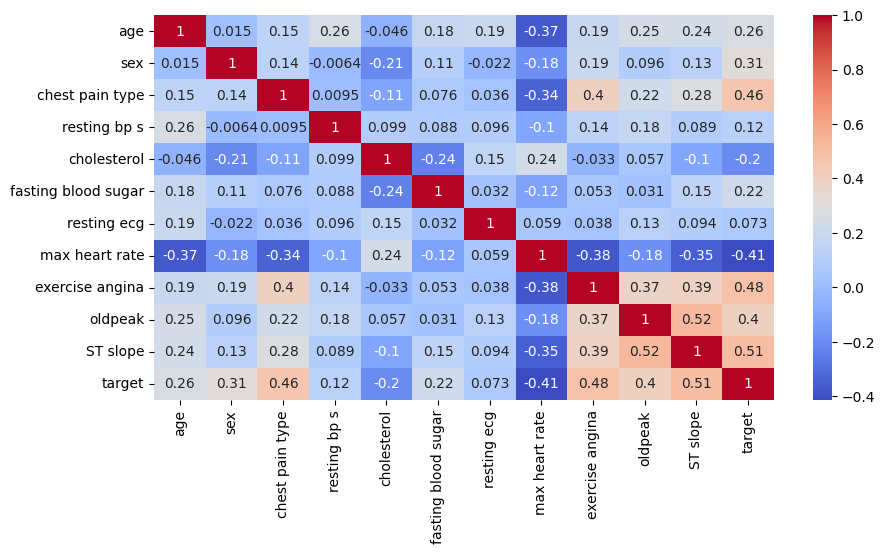

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Text(0.5, 1.0, 'Number of Men and Women')

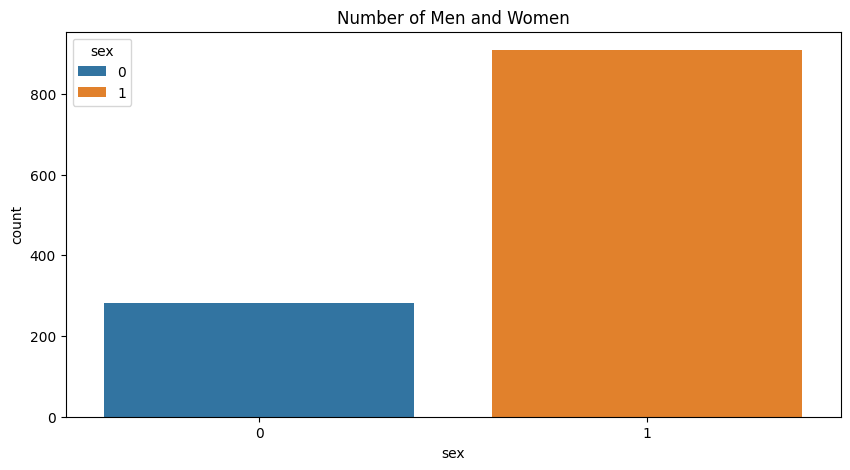

In [116]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="sex", hue='sex')
plt.title("Number of Men and Women")

# Logistic Regression

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [4]:
x=df.drop(columns=["target"])
y=df["target"]

In [5]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [6]:
sc=StandardScaler()

In [7]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [8]:
lr=LogisticRegression()

In [9]:
lr.fit(x_train, y_train)

LogisticRegression()

In [10]:
y_pred=lr.predict(x_test)

In [11]:
a1=accuracy_score(y_test, y_pred)

In [12]:
a1=accuracy_score(y_test, y_pred)
c1=classification_report(y_test, y_pred)
m1=confusion_matrix(y_test, y_pred)

In [13]:
print("Accuracy Score is :\n ", a1)
print("\n")
print("Classification Report is :\n", c1)
print("\n")
print("Confusion Matrix is :\n", m1)

Accuracy Score is :
  0.8529411764705882


Classification Report is :
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.88      0.85      0.86       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



Confusion Matrix is :
 [[ 91  16]
 [ 19 112]]


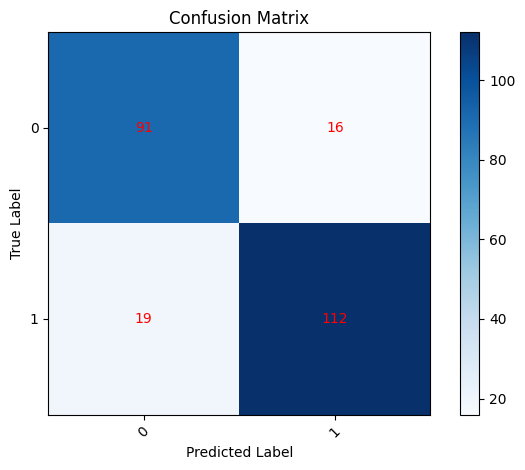

In [15]:
plt.imshow(m1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['0', '1']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m1.shape[0]):
    for j in range(m1.shape[1]):
        plt.text(j, i, format(m1[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc=DecisionTreeClassifier()

In [18]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred=dtc.predict(x_test)

In [20]:
accuracy_score(y_test, y_pred)

0.8571428571428571

In [21]:
a2=accuracy_score(y_test, y_pred)
c2=classification_report(y_test, y_pred)
m2=confusion_matrix(y_test, y_pred)

In [22]:
print("Accuracy Score is :\n ", a2)
print("\n")
print("Classification Report is :\n", c2)
print("\n")
print("Confusion Matrix is :\n", m2)

Accuracy Score is :
  0.8571428571428571


Classification Report is :
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.88      0.85      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



Confusion Matrix is :
 [[ 92  15]
 [ 19 112]]


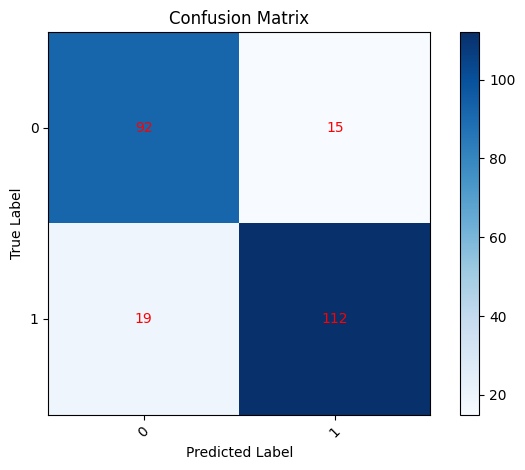

In [30]:
plt.imshow(m2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['0', '1']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m2.shape[0]):
    for j in range(m2.shape[1]):
        plt.text(j, i, format(m2[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Hyper Parameter Tuning for Decision Tree Classifier

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters={
    'max_features':['log 2','sqrt','auto'],
    'criterion':['entropy','gini'],
    'max_depth':[2,3,5,10,50],
    'min_samples_split':[2,3,50,100],
    'min_samples_leaf':[1,5,8,10]
}

In [26]:
grid_obj=GridSearchCV(dtc,parameters)

In [27]:
grid_obj=grid_obj.fit(x_train,y_train)

C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-pac

In [31]:
dt=grid_obj.best_estimator_

In [32]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='sqrt')

In [33]:
y_pred=dt.predict(x_test)

In [34]:
accuracy_score(y_test, y_pred)

0.8571428571428571

In [35]:
a3=accuracy_score(y_test, y_pred)
c3=classification_report(y_test, y_pred)
m3=confusion_matrix(y_test, y_pred)

In [36]:
print("Accuracy Score is :\n ", a3)
print("\n")
print("Classification Report is :\n", c3)
print("\n")
print("Confusion Matrix is :\n", m3)

Accuracy Score is :
  0.8571428571428571


Classification Report is :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       107
           1       0.90      0.83      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



Confusion Matrix is :
 [[ 95  12]
 [ 22 109]]


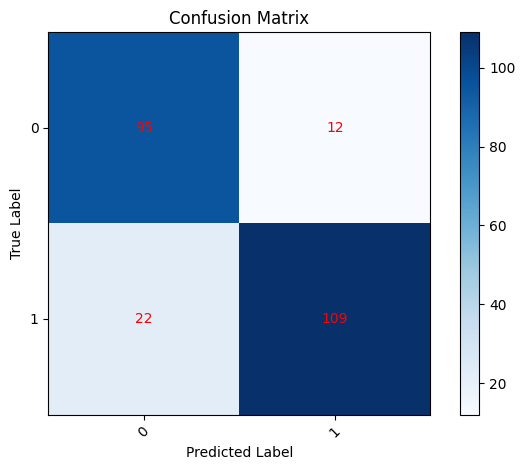

In [37]:
plt.imshow(m3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['0', '1']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m3.shape[0]):
    for j in range(m3.shape[1]):
        plt.text(j, i, format(m3[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier(n_estimators=1000)

In [40]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [41]:
y_pred=rfc.predict(x_test)

In [42]:
accuracy_score(y_test, y_pred)

0.9537815126050421

In [43]:
a4=accuracy_score(y_test, y_pred)
c4=classification_report(y_test, y_pred)
m4=confusion_matrix(y_test, y_pred)

In [44]:
print("Accuracy Score is :\n ", a4)
print("\n")
print("Classification Report is :\n", c4)
print("\n")
print("Confusion Matrix is :\n", m4)

Accuracy Score is :
  0.9537815126050421


Classification Report is :
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.94      0.98      0.96       131

    accuracy                           0.95       238
   macro avg       0.96      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



Confusion Matrix is :
 [[ 99   8]
 [  3 128]]


In [102]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 99,   8],
       [  3, 128]])

Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix')

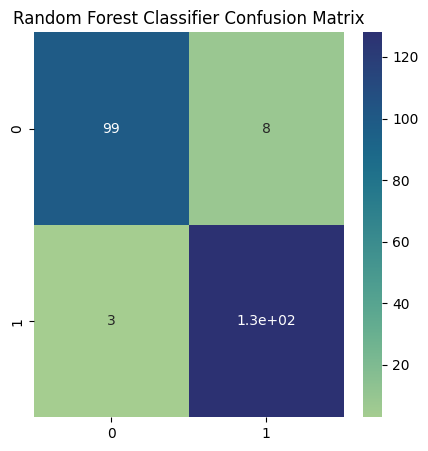

In [108]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True, cmap="crest")
plt.title("Random Forest Classifier Confusion Matrix")

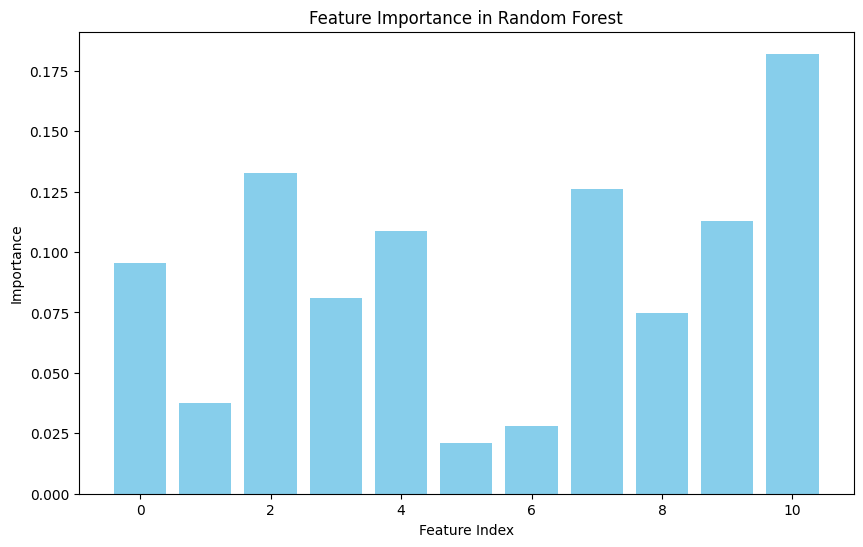

In [109]:
feature_importances = rfc.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, color='skyblue')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

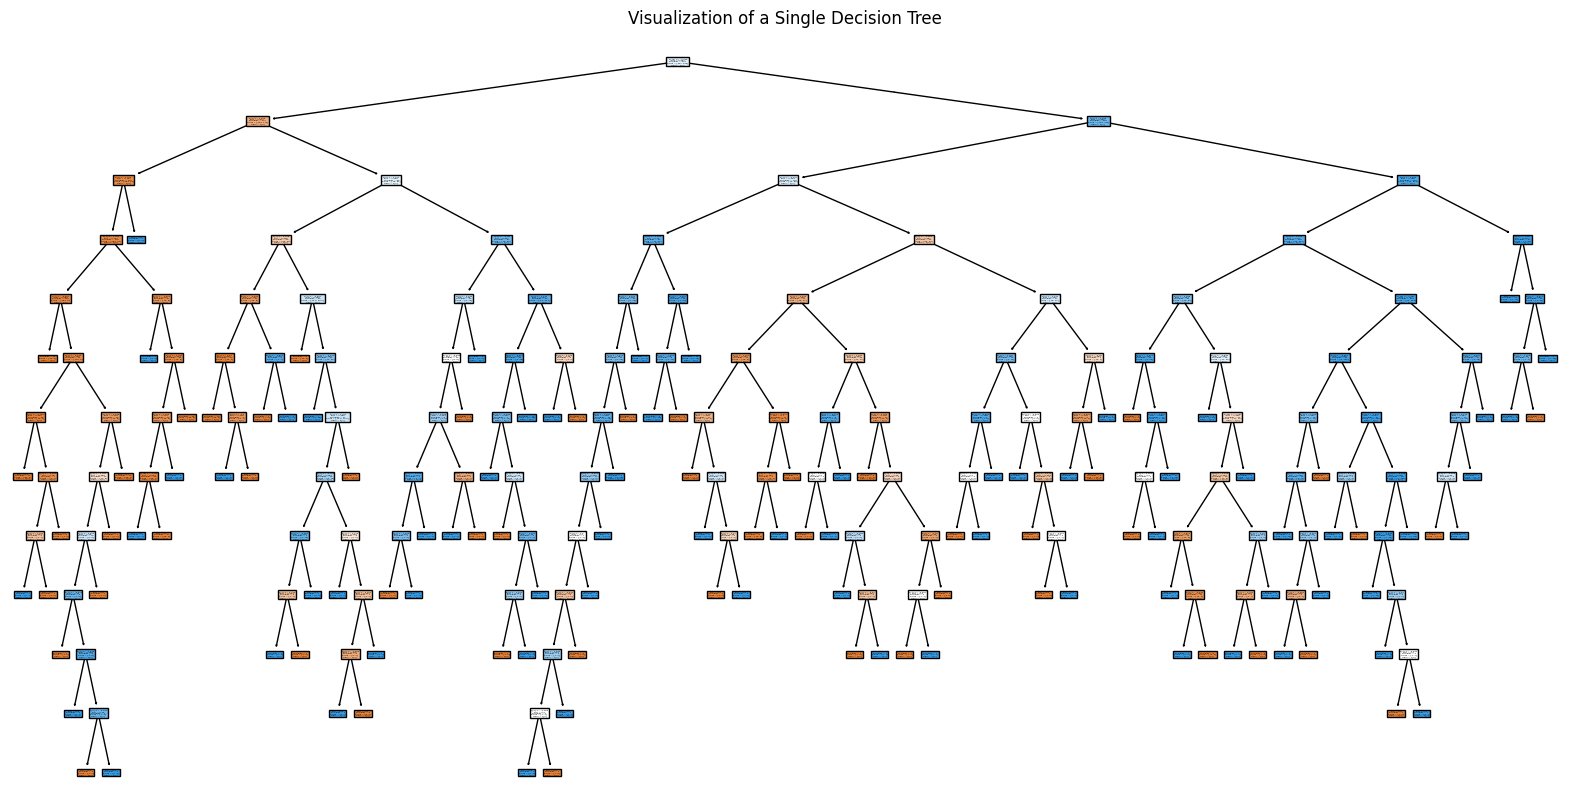

In [111]:
from sklearn.tree import plot_tree

# Visualize one tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[0], filled=True, feature_names=None, class_names=True)
plt.title('Visualization of a Single Decision Tree')
plt.show()


# Extra Trees

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
et=ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [47]:
et.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [49]:
y_pred=et.predict(x_test)

In [50]:
accuracy_score(y_test, y_pred)

0.9453781512605042

In [51]:
a5=accuracy_score(y_test, y_pred)
c5=classification_report(y_test, y_pred)
m5=confusion_matrix(y_test, y_pred)

In [52]:
print("Accuracy Score is :\n ", a5)
print("\n")
print("Classification Report is :\n", c5)
print("\n")
print("Confusion Matrix is :\n", m5)

Accuracy Score is :
  0.9453781512605042


Classification Report is :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.95      0.95      0.95       131

    accuracy                           0.95       238
   macro avg       0.94      0.95      0.94       238
weighted avg       0.95      0.95      0.95       238



Confusion Matrix is :
 [[101   6]
 [  7 124]]


In [124]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[101,   6],
       [  7, 124]])

<Axes: >

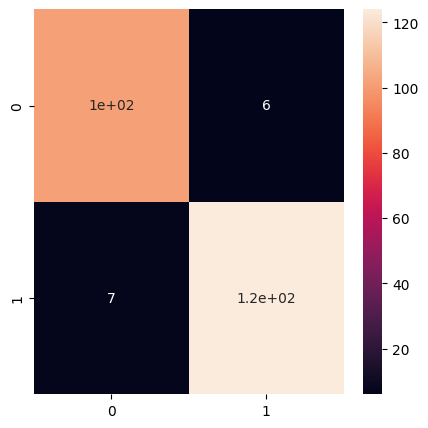

In [123]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)